<a href="https://colab.research.google.com/github/Faza20-lab/Projet_stats/blob/Marine/Projet_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preset**

In [121]:
!pip install netCDF4

In [117]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import norm, shapiro, kstest, genextreme, genpareto
from scipy.stats import gamma
import scipy.stats as st


file_prec = '/content/drive/MyDrive/data/ERA5_prec_daily_1940_2023_FR_brittany.nc'
ds = xr.open_dataset(file_prec)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Visualisation des données:**

## Visualisation des données de precipitations et définition de X:

In [119]:
ds_djf = ds.sel(time=ds['time'].dt.month.isin([1, 2, 12]))
print(ds_djf)
ds_djf.sizes

<xarray.Dataset> Size: 5MB
Dimensions:    (Latitude: 12, Longitude: 14, time: 7550)
Coordinates:
  * Latitude   (Latitude) float64 96B 49.0 48.75 48.5 48.25 ... 46.75 46.5 46.25
  * Longitude  (Longitude) float64 112B -4.75 -4.5 -4.25 ... -2.0 -1.75 -1.5
  * time       (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    lon        (Longitude) float64 112B ...
    lat        (Latitude) float64 96B ...
    height     float64 8B ...
Data variables:
    pr         (Latitude, Longitude, time) float32 5MB ...


Frozen({'Latitude': 12, 'Longitude': 14, 'time': 7550})

In [122]:
ds.sizes

Frozen({'Latitude': 12, 'Longitude': 14, 'time': 30449})

In [123]:
print(ds['time'])

<xarray.DataArray 'time' (time: 30449)> Size: 244kB
array(['1940-01-01T00:00:00.000000000', '1940-01-02T00:00:00.000000000',
       '1940-01-03T00:00:00.000000000', ..., '2023-05-11T00:00:00.000000000',
       '2023-05-12T00:00:00.000000000', '2023-05-13T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 244kB 1940-01-01 1940-01-02 ... 2023-05-13
    height   float64 8B ...


In [124]:
ds.time.values[:10]

array(['1940-01-01T00:00:00.000000000', '1940-01-02T00:00:00.000000000',
       '1940-01-03T00:00:00.000000000', '1940-01-04T00:00:00.000000000',
       '1940-01-05T00:00:00.000000000', '1940-01-06T00:00:00.000000000',
       '1940-01-07T00:00:00.000000000', '1940-01-08T00:00:00.000000000',
       '1940-01-09T00:00:00.000000000', '1940-01-10T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [125]:
ds.time.values[10:]

array(['1940-01-11T00:00:00.000000000', '1940-01-12T00:00:00.000000000',
       '1940-01-13T00:00:00.000000000', ...,
       '2023-05-11T00:00:00.000000000', '2023-05-12T00:00:00.000000000',
       '2023-05-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [126]:
print(ds.Latitude.values)
print(ds.Longitude.values)

[49.   48.75 48.5  48.25 48.   47.75 47.5  47.25 47.   46.75 46.5  46.25]
[-4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.
 -1.75 -1.5 ]


In [127]:
da = ds['pr'].isel(time=0)   # un jour = une carte
df = da.to_dataframe().reset_index()

In [128]:
print(df.head())

   Latitude  Longitude       time   lon   lat  height  pr
0      49.0      -4.75 1940-01-01 -4.75  49.0     0.0 NaN
1      49.0      -4.50 1940-01-01 -4.50  49.0     0.0 NaN
2      49.0      -4.25 1940-01-01 -4.25  49.0     0.0 NaN
3      49.0      -4.00 1940-01-01 -4.00  49.0     0.0 NaN
4      49.0      -3.75 1940-01-01 -3.75  49.0     0.0 NaN


In [129]:
print(da)

<xarray.DataArray 'pr' (Latitude: 12, Longitude: 14)> Size: 672B
[168 values with dtype=float32]
Coordinates:
  * Latitude   (Latitude) float64 96B 49.0 48.75 48.5 48.25 ... 46.75 46.5 46.25
  * Longitude  (Longitude) float64 112B -4.75 -4.5 -4.25 ... -2.0 -1.75 -1.5
    time       datetime64[ns] 8B 1940-01-01
    lon        (Longitude) float64 112B ...
    lat        (Latitude) float64 96B ...
    height     float64 8B ...


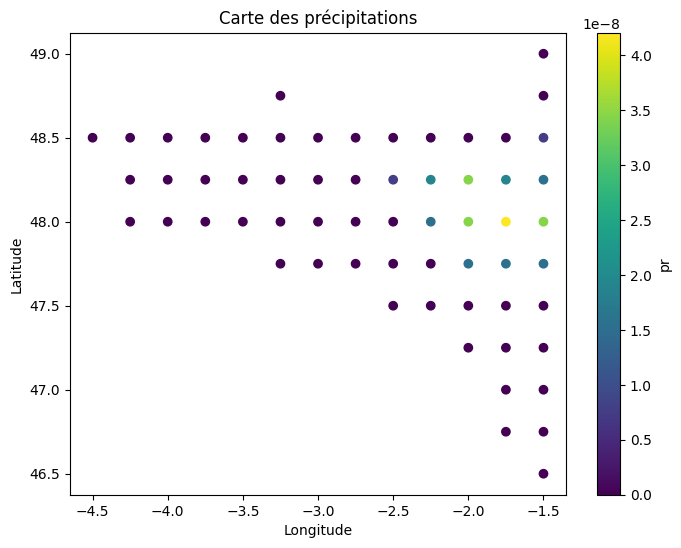

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(df["Longitude"], df["Latitude"], c=df["pr"])
plt.colorbar(label="pr")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Carte des précipitations")
plt.show()

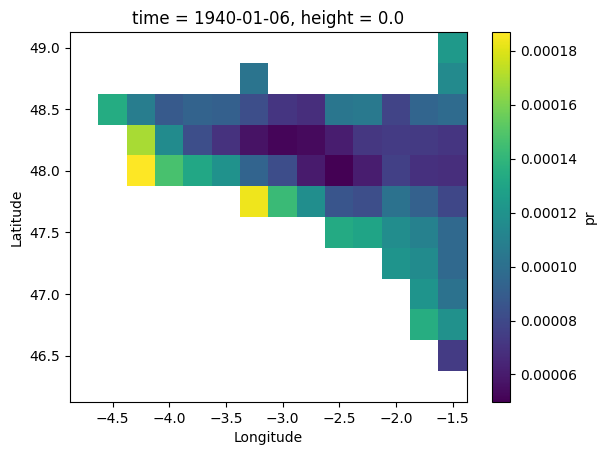

In [118]:
ds.pr[:,:,5].plot()


In [120]:
somme_quotidienne_pr_djf=ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])
print(somme_quotidienne_pr_djf)
X= somme_quotidienne_pr_djf
print(len(X))

<xarray.DataArray 'pr' (time: 7550)> Size: 30kB
array([2.7539755e-07, 0.0000000e+00, 3.9131618e-03, ..., 1.3772695e-05,
       2.4685729e-05, 2.1683841e-03], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
7550


In [133]:
#conversion de kg/m²/s en mm-1
seconds_per_day = 24 * 60 * 60  # 86400

X_mm_per_day = X * seconds_per_day # x(1000/1000)

# Mettre à jour le DataArray avec une nouvelle unité
X_mm_per_day = X_mm_per_day.rename("pr_mm_per_day")
X_mm_per_day.attrs['units'] = 'mm/day'
X_mm_per_day.attrs['description'] = 'Précipitation journalière convertie de kg/m²/s → mm/j'
X=X_mm_per_day #Nouveau X

print(X_mm_per_day)

<xarray.DataArray 'pr_mm_per_day' (time: 7550)> Size: 30kB
array([2.3794349e-02, 0.0000000e+00, 3.3809717e+02, ..., 1.1899608e+00,
       2.1328471e+00, 1.8734839e+02], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
Attributes:
    units:        mm/day
    description:  Précipitation journalière convertie de kg/m²/s → mm/j


## Visualisation des données de vents et définition de Y:

In [134]:
file_wind = '/content/drive/MyDrive/data/ERA5_wind_daily_1940_2023_FR_brittany.nc'
ds2 = xr.open_dataset(file_wind)

In [135]:
ds2.head()

<xarray.Dataset> Size: 708B
Dimensions:    (Latitude: 5, Longitude: 5, time: 5)
Coordinates:
  * Latitude   (Latitude) float64 40B 49.0 48.75 48.5 48.25 48.0
  * Longitude  (Longitude) float64 40B -4.75 -4.5 -4.25 -4.0 -3.75
  * time       (time) datetime64[ns] 40B 1940-01-01 1940-01-02 ... 1940-01-05
    lon        (Longitude) float64 40B ...
    lat        (Latitude) float64 40B ...
    height     float64 8B ...
Data variables:
    sfcWind    (Latitude, Longitude, time) float32 500B ...

In [136]:
ds2_djf = ds2.sel(time=ds2['time'].dt.month.isin([1, 2, 12]))
print(ds2_djf)
ds2_djf.sizes

<xarray.Dataset> Size: 5MB
Dimensions:    (Latitude: 12, Longitude: 14, time: 7550)
Coordinates:
  * Latitude   (Latitude) float64 96B 49.0 48.75 48.5 48.25 ... 46.75 46.5 46.25
  * Longitude  (Longitude) float64 112B -4.75 -4.5 -4.25 ... -2.0 -1.75 -1.5
  * time       (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    lon        (Longitude) float64 112B ...
    lat        (Latitude) float64 96B ...
    height     float64 8B ...
Data variables:
    sfcWind    (Latitude, Longitude, time) float32 5MB ...


Frozen({'Latitude': 12, 'Longitude': 14, 'time': 7550})

In [137]:
mean_quotidienne_sfcWind_djf=ds2_djf['sfcWind'].mean(dim=['Latitude', 'Longitude'])
print(mean_quotidienne_sfcWind_djf)
Y= mean_quotidienne_sfcWind_djf
print(len(Y))

<xarray.DataArray 'sfcWind' (time: 7550)> Size: 30kB
array([7.834759 , 7.027803 , 6.503153 , ..., 8.036703 , 7.9032125,
       7.3788795], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
7550


# **Etude des précipitations (X): distribution normale**

Paramètres normale : 0.001791202 0.0026892326
Log-vraisemblance maximale : 33971.68494381409
AIC = -67939.36988762819


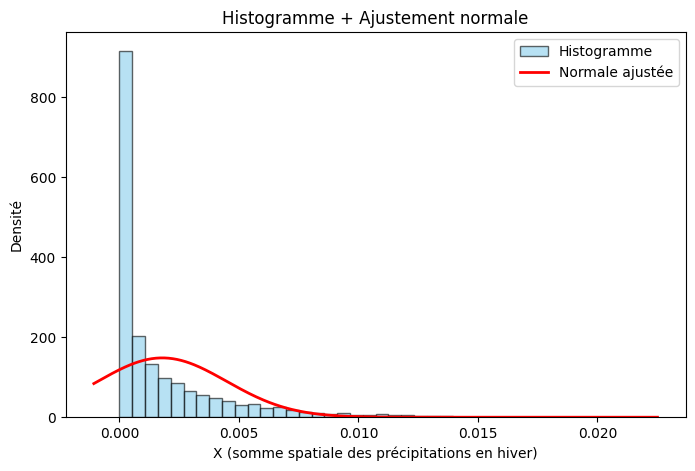

In [138]:

# Ajustement à la loi normale
mu, sigma = norm.fit(X)
print("Paramètres normale :", mu, sigma)

# Histogramme + densité normale ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(X, bins=40, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label="Histogramme")

# Courbe théorique normale ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=2, label="Normale ajustée")

plt.xlabel("X (somme spatiale des précipitations en hiver)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement normale")
plt.legend()

# Log-vraisemblance
logL = np.sum(norm.logpdf(X, mu, sigma))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres : mu, sigma)
AIC_norm = 2*2 - 2*logL
print("AIC =", AIC_norm)


In [139]:


# ------ Shapiro-Wilk ------
shapiro_stat, shapiro_p = shapiro(X)
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# ------ KS (Kolmogorov-Smirnov) ------
ks_stat, ks_p = kstest(X, 'norm', args=(mu, sigma))
print("Test KS (paramètres estimés) :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)



Test Shapiro-Wilk :
  statistique = 0.6938399482096498
  p-value     = 2.6007504597831528e-79 

Test KS (paramètres estimés) :
  statistique = 0.25268329868908956
  p-value     = 0.0


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7550.
  res = hypotest_fun_out(*samples, **kwds)


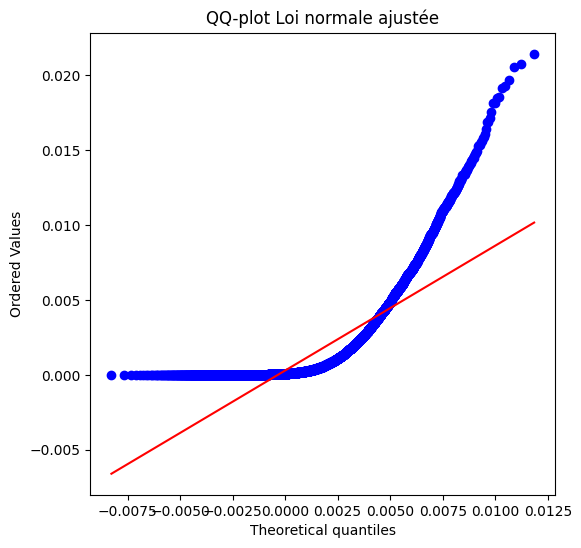

In [140]:
# Diagramme Quantile-Quantile de la normale
plt.figure(figsize=(6,6))
st.probplot(X, dist=norm, sparams=(mu, sigma), plot=plt)
plt.title("QQ-plot Loi normale ajustée")
plt.show()

# **Etude des queues de distribution pour les précipitations**

## Définition des variables:

On définit quatre variables :

1) **WinterPI :** la somme des précipitations sur tout l’hiver DJF (Décembre-Janvier-Février) en mm, calculée sur toutes les latitudes et longitudes.

2) **Somme_mois :** la somme des précipitations pour chaque mois de l’hiver DJF en mm, calculée sur toutes les latitudes et longitudes.

3) **pr_max_an :** la précipitation maximale observée sur un jour de chaque hiver (DJF), en mm, également intégrée sur toutes les latitudes et longitudes.

4) **pr_max_mois :** la valeur maximale de précipitation enregistrée sur un jour pour chaque mois, exprimée en mm et calculée en intégrant toutes les latitudes et longitudes.

In [170]:
ds['pr'] = ds['pr'] * 86400  # 86400 secondes = 1 jour

# --- Somme journalière spatiale ---
somme_quotidienne_pr_djf = ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])

# --- Somme totale par hiver ---
annee_hiver = ds_djf['time.year'].where(ds_djf['time.month'] != 12, ds_djf['time.year'] + 1)
WinterPI = ds_djf['pr'].groupby(annee_hiver).sum(dim=['time', 'Latitude', 'Longitude'])
WinterPI = WinterPI.assign_coords(year=np.unique(annee_hiver.values))

# --- Somme mensuelle ---
Somme_mois = ds_djf['pr'].groupby('time.month').sum(dim=['Latitude', 'Longitude'])


# Maximum journalier par mois (somme spatiale) pour chaque mois de chaque année
pr_journalier = ds_djf['pr'].sum(dim=['Latitude','Longitude'])

# --- Jour du maximum par an ---

pr_max_an = ds_djf['pr'].sum(dim=['Latitude','Longitude']).groupby('time.year').max()



# --- Affichage final ---
print("\n=== WinterPI (somme d'un hiver DJF) ===\n", WinterPI)
print("Nombre d'hivers :", len(WinterPI))

print("\n=== Somme par mois (DJF) ===\n", Somme_mois)
print("Nombre de mois DJF :", len(Somme_mois))

print("\n=== Max par mois (précipitation journalière max) ===\n",pr_max_an )
print("Nombre d'année :", len(pr_max_an))
pr_max_an.shape



=== WinterPI (somme d'un hiver DJF) ===
 <xarray.DataArray 'pr' (year: 84)> Size: 336B
array([7.23841856e+08, 1.31090048e+09, 6.82720256e+08, 1.39396813e+09,
       5.31084608e+08, 9.92814720e+08, 1.15663309e+09, 9.75321600e+08,
       1.14894592e+09, 1.08598221e+09, 1.15418022e+09, 1.48058547e+09,
       8.44891264e+08, 7.92436864e+08, 7.53585152e+08, 1.34635558e+09,
       1.01328493e+09, 1.54478566e+09, 1.30662861e+09, 9.89258880e+08,
       1.56703309e+09, 1.39653683e+09, 1.24078541e+09, 7.25599104e+08,
       5.75708096e+08, 1.08256499e+09, 1.74866829e+09, 1.23201792e+09,
       9.82767680e+08, 1.04245952e+09, 1.38167142e+09, 8.48550336e+08,
       1.30334502e+09, 8.00018816e+08, 1.49768755e+09, 7.89038272e+08,
       4.98484032e+08, 1.47045248e+09, 1.69424243e+09, 2.10667059e+09,
       1.41037363e+09, 8.39395584e+08, 1.60327526e+09, 1.19500826e+09,
       1.33116954e+09, 1.21359923e+09, 1.44584730e+09, 7.97848576e+08,
       1.74326822e+09, 6.60698624e+08, 2.07514317e+09, 1.074

(84,)

In [185]:
#max par mois
# Créer un DataArray 'year_month' correspondant à chaque date
year_month = xr.DataArray(
    ds_djf['time'].dt.year * 100 + ds_djf['time'].dt.month,  # format YYYYMM
    coords={'time': ds_djf['time']},
    dims='time'
)

# Maximum journalier par mois (somme spatiale)
pr_journalier = ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])
pr_max_mois = pr_journalier.groupby(year_month).max()

print(pr_max_mois)
print("Nombre de mois :", len(pr_max_mois))


<xarray.DataArray 'pr' (group: 251)> Size: 2kB
array([7.34591840e+07, 4.00896440e+07, 6.65221280e+07, 1.55023648e+08,
       6.58914760e+07, 2.96076820e+07, 6.27451040e+07, 2.42668320e+07,
       7.01276640e+07, 1.60073920e+08, 5.88152480e+07, 7.36743440e+07,
       5.14653200e+07, 1.91357640e+07, 1.05348904e+08, 4.78714720e+07,
       5.87411680e+07, 5.50646560e+07, 6.62206400e+07, 5.23194200e+07,
       7.89312080e+07, 4.14054480e+07, 4.92737280e+07, 1.03927528e+08,
       8.70001760e+07, 2.28182440e+07, 9.50470560e+07, 8.14945040e+07,
       3.52070560e+07, 4.76374960e+07, 4.62727120e+07, 1.02329224e+08,
       7.54598400e+07, 6.21565120e+07, 1.11173512e+08, 6.39640240e+07,
       4.70708640e+07, 2.60429520e+07, 9.65392480e+07, 4.52745920e+07,
       4.48441680e+07, 2.58150740e+07, 6.93156800e+07, 6.23036880e+07,
       7.19137920e+07, 1.03411888e+08, 7.78409520e+07, 5.62412960e+07,
       8.29030000e+07, 1.29470260e+07, 6.90946800e+07, 2.20062520e+07,
       8.58332320e+07, 6.22259

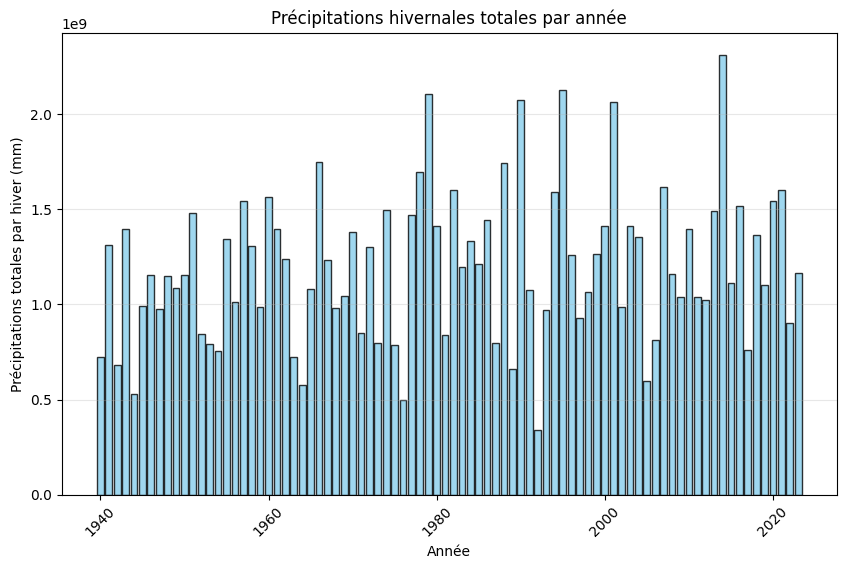

In [171]:
# Histogramme des précipitations par hiver pour chaque année
plt.figure(figsize=(10,6))
plt.bar(WinterPI.year, WinterPI.values, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Année")
plt.ylabel("Précipitations totales par hiver (mm)")
plt.title("Précipitations hivernales totales par année")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

## GEV sur les maximums hivernaux de précipitation

mu: 97291087.8095238 sigma: 24504568.748347465


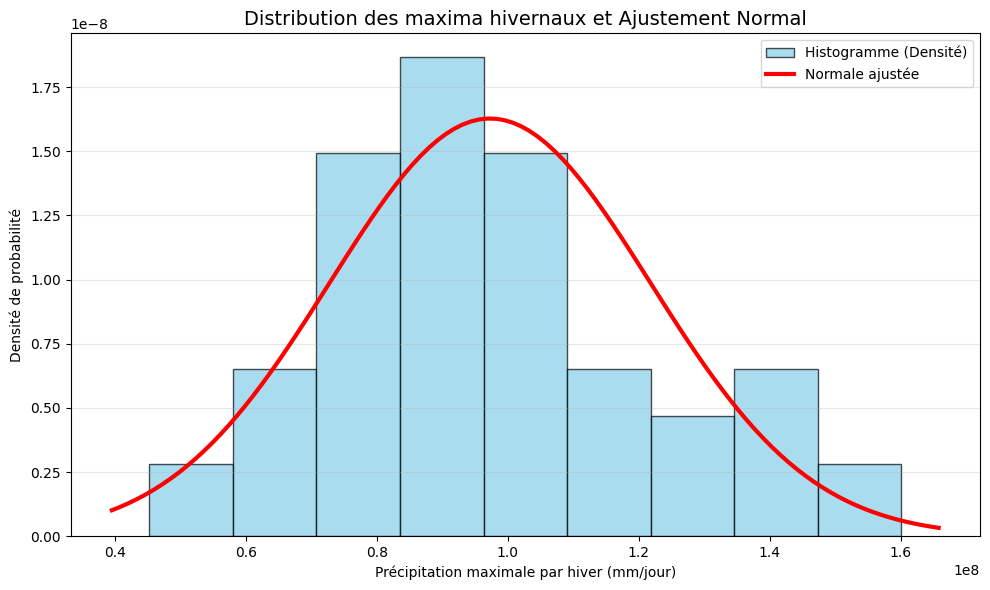

In [180]:
# --- Tracé de l'histogramme en densité ---
plt.figure(figsize=(10,6))
# Calculer le nombre de bins (sqrt(N) ici) pour le pas de l'histogramme
bins = int(np.sqrt(len(pr_max_an.values)))

plt.hist(pr_max_an.values, bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (Densité)')

# --- Courbe normale ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 100)

mu, sigma = norm.fit(pr_max_an.values)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=3,
         label=f'Normale ajustée')
print("mu:", mu, "sigma:", sigma)

# --- Labels et légende ---
plt.xlabel("Précipitation maximale par hiver (mm/jour)")
plt.ylabel("Densité de probabilité")
plt.title("Distribution des maxima hivernaux et Ajustement Normal", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Paramètres GEV ajustés :
 c (shape) = -6.561, loc = 45274592.29, scale = 1.93


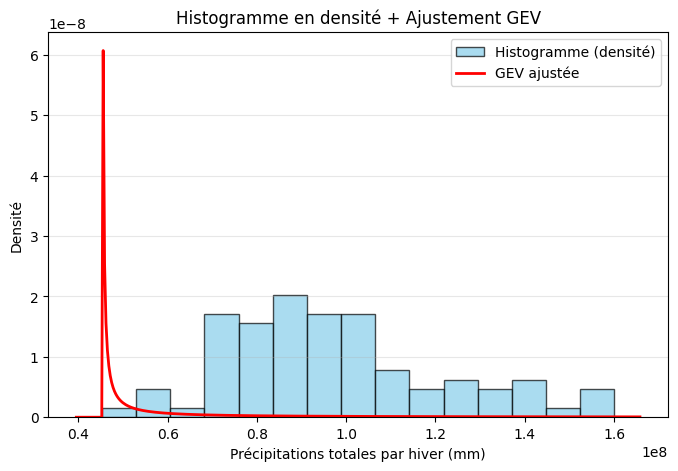

In [181]:

# --- Ajustement GEV ---
# genextreme utilise un paramètre c (shape), loc (location), scale (scale)
c, loc, scale = genextreme.fit(pr_max_an.values)
print(f"Paramètres GEV ajustés :\n c (shape) = {c:.3f}, loc = {loc:.2f}, scale = {scale:.2f}")

# --- Histogramme en densité ---
plt.figure(figsize=(8,5))
plt.hist(pr_max_an.values, bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (densité)')

# --- Courbe GEV ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GEV ajustée')

# --- Labels et légende ---
plt.xlabel("Précipitations totales par hiver (mm)")
plt.ylabel("Densité")
plt.title("Histogramme en densité + Ajustement GEV")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()



In [182]:

# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(WinterPI.values, gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genextreme.logpdf(WinterPI.values, c, loc=loc, scale=scale))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)



Test KS (GEV ajustée) :
  Statistique = 0.9584745077109017
  p-value     = 1.7356906986456597e-116
Log-vraisemblance maximale : -2190.723421352708
AIC = 4387.446842705416


**Raisons du Mauvais Ajustement**

On a trop peu de valeurs

## GEV sur les maximums mensuels de précipitation

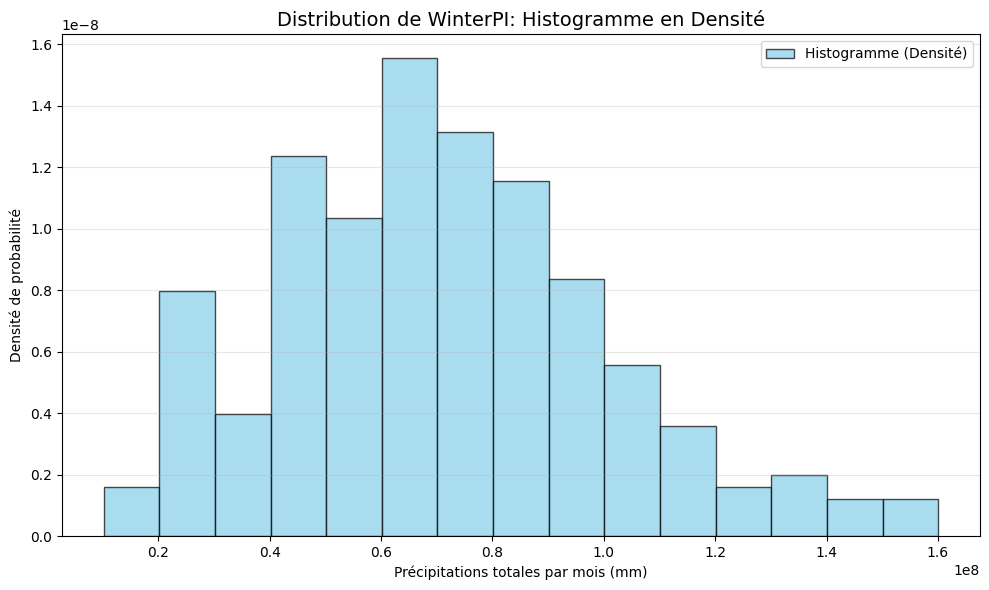

In [186]:
# --- Tracé de l'histogramme en densité ---
plt.figure(figsize=(10,6))
# Calculer le nombre de bins (souvent sqrt(N) ou formule de Freedman-Diaconis)
bins = int(np.sqrt(len(pr_max_mois)))

plt.hist(pr_max_mois, bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (Densité)')

# --- Labels et légende ---
plt.xlabel("Précipitations totales par mois (mm)")
plt.ylabel("Densité de probabilité")
plt.title("Distribution de WinterPI: Histogramme en Densité", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

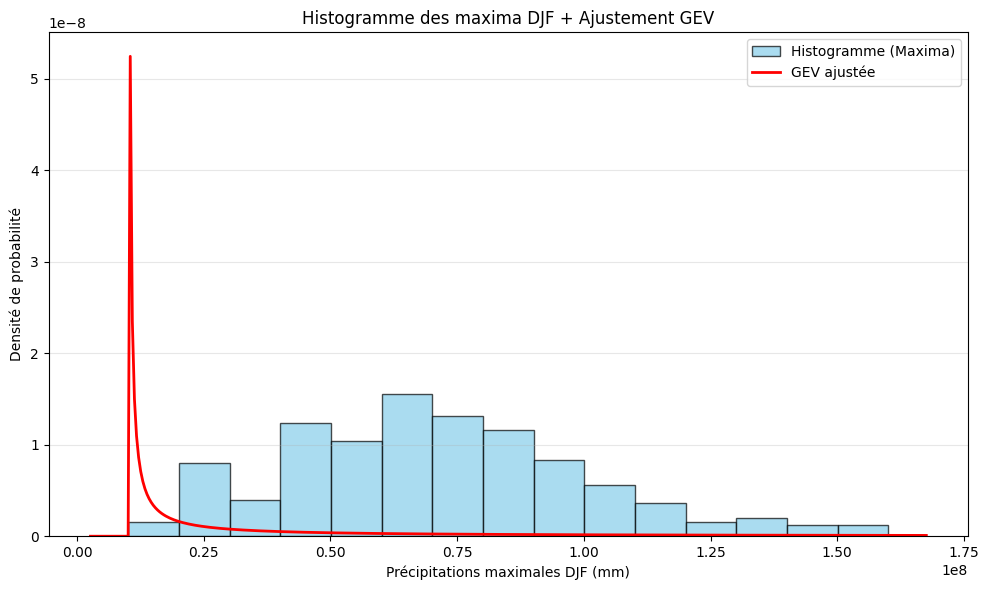

Paramètres GEV : shape(c)=-13.995, loc=10159716.6, scale=7.9


In [187]:
# Extraire les valeurs numériques
data_max_values = pr_max_mois.values

# Ajustement GEV
c, loc, scale = genextreme.fit(data_max_values)

# Histogramme des maxima
plt.figure(figsize=(10,6))
bins = int(np.sqrt(len(data_max_values)))
plt.hist(data_max_values, bins=bins, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (Maxima)')

# Courbe GEV ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GEV ajustée')

plt.xlabel("Précipitations maximales DJF (mm)")
plt.ylabel("Densité de probabilité")
plt.title("Histogramme des maxima DJF + Ajustement GEV")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Paramètres GEV
print(f"Paramètres GEV : shape(c)={c:.3f}, loc={loc:.1f}, scale={scale:.1f}")




In [189]:
# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(pr_max_mois, gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

Test KS (GEV ajustée) :
  Statistique = 0.7264286830382416
  p-value     = 2.157487991228983e-135


## GPD sur le cumul hivernal de précipitation

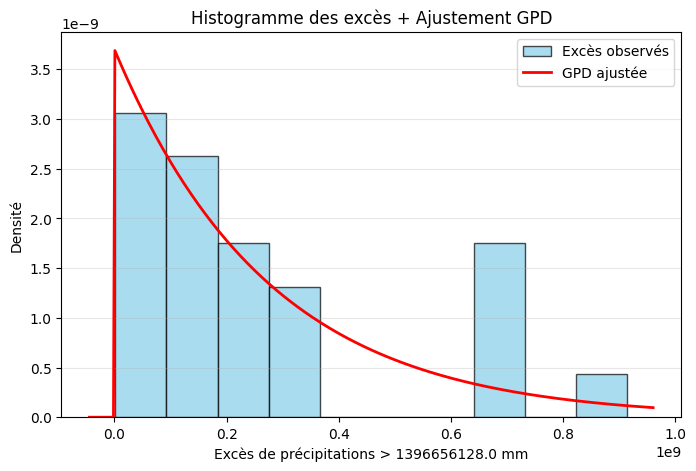

Paramètres GPD : shape(c)=-0.024, loc=-1615850.8, scale=268815438.6


In [190]:

# --- 1. Choisir un seuil pour les extrêmes ---
seuil = np.percentile(WinterPI.values, 70)  # 70ème percentile
exceedances = WinterPI.values[WinterPI.values > seuil] - seuil  # excès au-dessus du seuil

# --- 2. Ajuster la GPD aux excès ---
c, loc, scale = genpareto.fit(exceedances)

# --- 3. Histogramme des excès (densité) ---
plt.figure(figsize=(8,5))
plt.hist(exceedances, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# --- 4. Courbe GPD ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GPD ajustée')

# --- 5. Labels et légende ---
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- 6. Affichage des paramètres ---
print(f"Paramètres GPD : shape(c)={c:.3f}, loc={loc:.1f}, scale={scale:.1f}")


In [ ]:
# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances, c, loc=loc, scale=scale))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

**Remarque**: on a peu de valeurs pourtant on a pris un seuil bas, donc on passe au cumul par mois

## GPD sur le cumul mensuel de précipitation

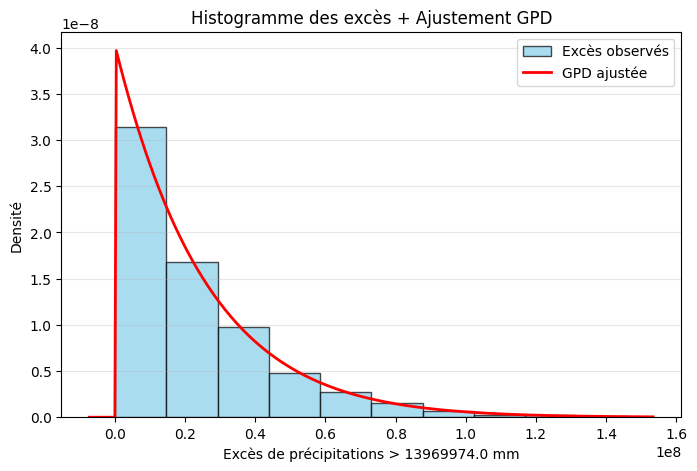

Paramètres GPD : shape(c)=-0.046, loc=4453.0, scale=24867912.6


In [191]:
# --- 1. Choisir un seuil pour les extrêmes ---
seuil = np.percentile(Somme_mois, 70)  # 70ème percentile
exceedances = Somme_mois[Somme_mois > seuil] - seuil  # excès au-dessus du seuil

# --- 2. Ajuster la GPD aux excès ---
c, loc, scale = genpareto.fit(exceedances)

# --- 3. Histogramme des excès (densité) ---
plt.figure(figsize=(8,5))
plt.hist(exceedances, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# --- 4. Courbe GPD ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GPD ajustée')

# --- 5. Labels et légende ---
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- 6. Affichage des paramètres ---
print(f"Paramètres GPD : shape(c)={c:.3f}, loc={loc:.1f}, scale={scale:.1f}")

In [ ]:
# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances, c, loc=0, scale=scale))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

# **Etude des vents (Y): distribution normale**

In [ ]:
# Pour Y
# Ajustement à la loi normale
mu, sigma = norm.fit(Y)
print("Paramètres normale :", mu, sigma)

# Histogramme + densité normale ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(Y, bins=40, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label="Histogramme")

# Courbe théorique normale ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=2, label="Normale ajustée")

plt.xlabel("Y (vitesse des vents)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement normale")
plt.legend()

# Log-vraisemblance
logL = np.sum(norm.logpdf(Y, mu, sigma))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres : mu, sigma)
AIC_norm = 2*2 - 2*logL
print("AIC =", AIC_norm)

# ------ Shapiro-Wilk ------
shapiro_stat, shapiro_p = shapiro(Y)
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# ------ KS (Kolmogorov-Smirnov) ------
ks_stat, ks_p = kstest(Y, 'norm', args=(mu, sigma))
print("Test KS :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)


In [ ]:
# Diagramme Quantile-Quantile de la noramle
plt.figure(figsize=(6,6))
st.probplot(Y, dist=norm, sparams=(mu, sigma), plot=plt)
plt.title("QQ-plot Loi normale ajustée")
plt.show()

# **Etude des queues de distribution pour les vents**

##  GEV max mensuel

In [ ]:
# --- Grouper par année et par mois ---
Y_max = Y.groupby('time.year').map(lambda x: x.groupby('time.month').max(dim='time'))

# --- Transformer en numpy array (shape = nb_annees × 3) ---
Y_max_values = np.array([x.values for x in Y_max])
print("Shape avant flatten :", Y_max_values.shape)

# --- Transformer en vecteur 1D (flatten) ---
Y_max_month = Y_max_values.flatten()
print("Shape après flatten :", Y_max_month.shape)

# --- Affichage des 20 premières valeurs ---
print(Y_max_month)


In [ ]:
# --- Tracé de l'histogramme en densité ---
plt.figure(figsize=(10,6))
# Calculer le nombre de bins (souvent sqrt(N) ou formule de Freedman-Diaconis)
bins = int(np.sqrt(len(Y_max_month[:-1])))

plt.hist(Y_max_month[:-1], bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (Densité)')

# --- Courbe normale ajustée ---
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 100)
# Utilisez les vraies valeurs mu et sigma obtenues
mu, sigma = norm.fit(Y_max_month[:-1])
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=3,
         label=f'Normale ajustée\n($\mu$={mu:.0f}, $\sigma$={sigma:.0f})')

# --- Labels et légende ---
plt.xlabel("Précipitations totales par hiver (mm/jour $\\times$ surface)")
plt.ylabel("Densité de probabilité")
plt.title("Distribution de WinterPI: Histogramme en Densité et Ajustement Normal", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:

# ------ Shapiro-Wilk ------
shapiro_stat, shapiro_p = shapiro(Y_max_month[:-1])
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# ------ KS (Kolmogorov-Smirnov) ------
ks_stat, ks_p = kstest(Y_max_month[:-1], 'norm', args=(mu, sigma))
print("Test KS (paramètres estimés) :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)


In [ ]:


# Ajustement GEV
c, loc, scale = genextreme.fit(Y_max_month[:-1])

# Histogramme des maxima
plt.figure(figsize=(10,6))
bins = int(np.sqrt(len(Y_max_month[:-1])))
plt.hist(Y_max_month[:-1], bins=bins, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (Maxima)')

# Courbe GEV ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GEV ajustée')

plt.xlabel("Précipitations maximales DJF (mm)")
plt.ylabel("Densité de probabilité")
plt.title("Histogramme des maxima DJF + Ajustement GEV")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Paramètres GEV
print(f"Paramètres GEV : shape(c)={c:.3f}, loc={loc:.1f}, scale={scale:.1f}")


In [ ]:
# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(Y_max_month[:-1], gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)